In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 

In [2]:
from sklearn.metrics import classification_report, confusion_matrix, explained_variance_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("College_Data")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [5]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## Target
- prediction if a college is private or public

In [6]:
df["Private"] = pd.get_dummies(df["Private"], drop_first=True)

<AxesSubplot:xlabel='Private', ylabel='count'>

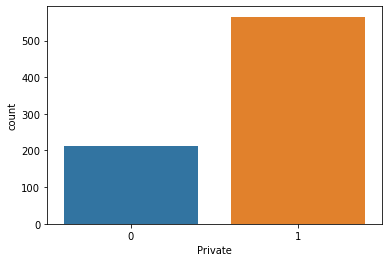

In [7]:
sns.countplot(x = df["Private"])

In [8]:
df.drop("Unnamed: 0", axis=1, inplace=True)

<AxesSubplot:>

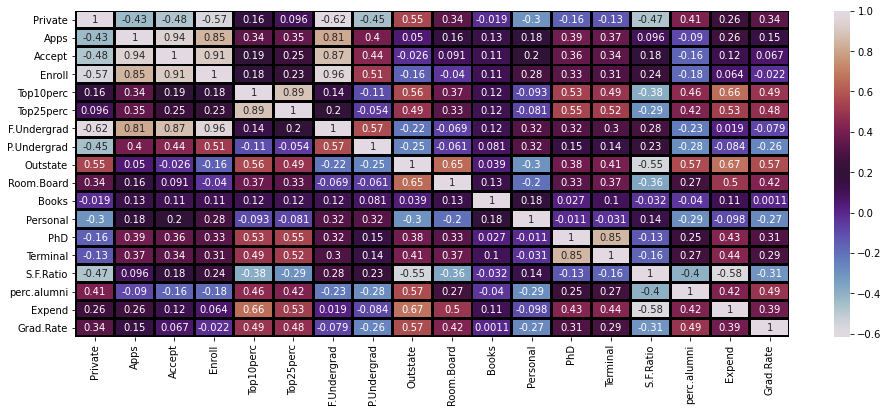

In [9]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot=True, linecolor="black", linewidths=2, cmap="twilight")

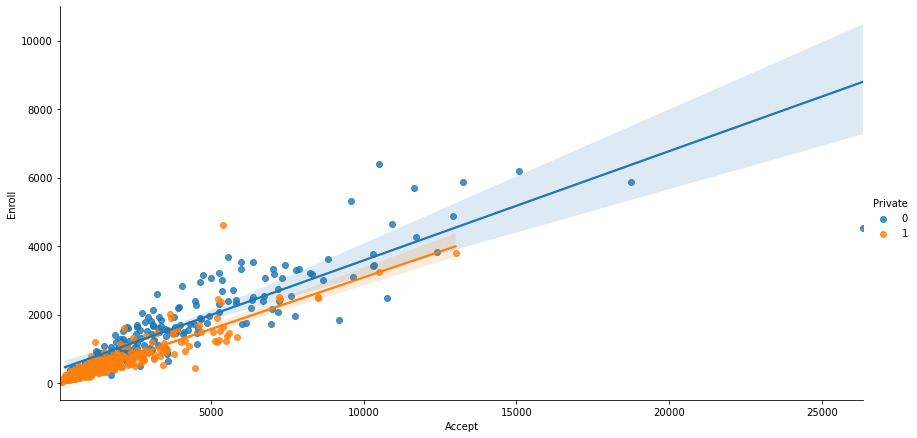

In [10]:
sns.lmplot(x = "Accept", y = "Enroll", data=df, hue="Private", height=6, aspect=2)

<AxesSubplot:xlabel='Private', ylabel='Outstate'>

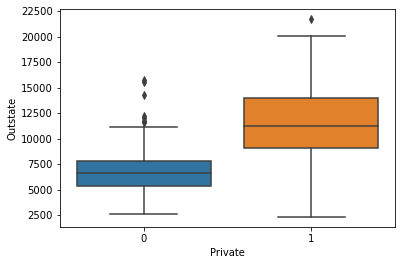

In [11]:
sns.boxplot(x = "Private", y = "Outstate", data=df)

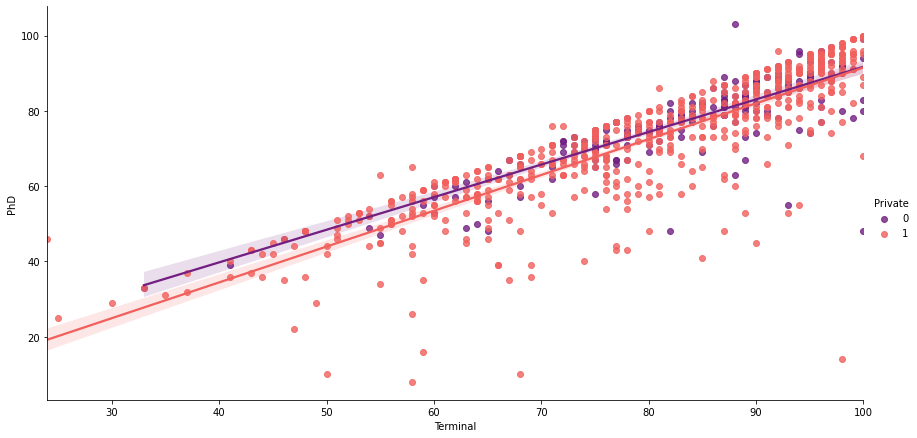

In [12]:
sns.lmplot(x = "Terminal", y = "PhD", data=df, hue="Private", height=6, aspect=2, palette="magma")

In [13]:
X = df.drop("Private", axis=1)
y = df["Private"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Log

In [15]:
logModel = LogisticRegression(n_jobs=350)

In [16]:
logModel.fit(X_train, y_train)

LogisticRegression(n_jobs=350)

In [17]:
predictions = logModel.predict(X_test)

In [18]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        67
           1       0.93      0.95      0.94       167

    accuracy                           0.91       234
   macro avg       0.89      0.88      0.89       234
weighted avg       0.91      0.91      0.91       234



# Random Forest

In [19]:
rf_Model = RandomForestClassifier(n_estimators=200, n_jobs=400)

In [20]:
rf_Model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=400)

In [21]:
rfPred = rf_Model.predict(X_test)

In [22]:
print(classification_report(rfPred, y_test))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83        63
           1       0.94      0.94      0.94       171

    accuracy                           0.91       234
   macro avg       0.88      0.89      0.89       234
weighted avg       0.91      0.91      0.91       234



# K nearest

In [23]:
kmModel = KNeighborsClassifier(n_neighbors=3)

In [24]:
kmModel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
kNeatPredictions = kmModel.predict(X_test)

In [26]:
print(classification_report(kNeatPredictions, y_test))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        60
           1       0.96      0.94      0.95       174

    accuracy                           0.93       234
   macro avg       0.90      0.92      0.91       234
weighted avg       0.93      0.93      0.93       234



## Improving KNearest
- Elbow method

In [27]:
errorRate = []
for i in range(1,50):
    mod = KNeighborsClassifier(n_neighbors=i, n_jobs=400)
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    errorRate.append(np.mean(pred != y_test))

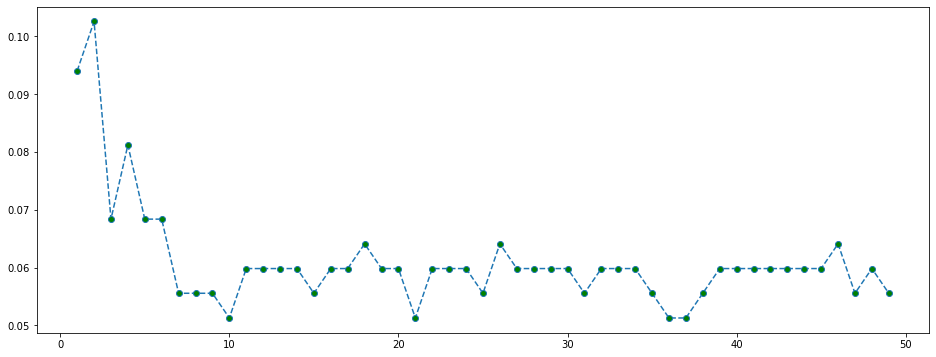

In [28]:
plt.figure(figsize=(16,6))
plt.plot(range(1,50), errorRate, ls = "--", marker  = "o", mfc = "green")

## K-Elbow
- we will use 10

In [29]:
Kmod = KNeighborsClassifier(n_neighbors=10, n_jobs=400)
Kmod.fit(X_train, y_train)
pred = Kmod.predict(X_test)

In [30]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        60
           1       0.98      0.95      0.97       174

    accuracy                           0.95       234
   macro avg       0.93      0.94      0.93       234
weighted avg       0.95      0.95      0.95       234



## SVM

In [31]:
svm = SVC()

In [32]:
svm.fit(X_train, y_train)

SVC()

In [33]:
predd = svm.predict(X_test)

In [34]:
print(classification_report(predd, y_test))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88        59
           1       0.97      0.94      0.96       175

    accuracy                           0.94       234
   macro avg       0.91      0.93      0.92       234
weighted avg       0.94      0.94      0.94       234



## Improving using graphing

In [35]:
scalar = StandardScaler()

In [36]:
scalar.fit(df.drop("Private", axis=1))

StandardScaler()

In [37]:
scaledFeatures = scalar.transform(df.drop("Private", axis=1))

In [38]:
scaledDf = pd.DataFrame(scaledFeatures, columns=X_train.columns)

In [39]:
X = scaledDf
y = df["Private"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [41]:
graphParam = {'C': [1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001, 0.0001]}

In [42]:
graphModel = GridSearchCV(estimator=SVC(), param_grid=graphParam, verbose=3)

In [43]:
graphModel.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .................................C=1, gamma=0.1; total time=   0.0s
[CV 2/5] END .................................C=1, gamma=0.1; total time=   0.0s
[CV 3/5] END .................................C=1, gamma=0.1; total time=   0.0s
[CV 4/5] END .................................C=1, gamma=0.1; total time=   0.0s
[CV 5/5] END .................................C=1, gamma=0.1; total time=   0.0s
[CV 1/5] END ................................C=1, gamma=0.01; total time=   0.0s
[CV 2/5] END ................................C=1, gamma=0.01; total time=   0.0s
[CV 3/5] END ................................C=1, gamma=0.01; total time=   0.0s
[CV 4/5] END ................................C=1, gamma=0.01; total time=   0.0s
[CV 5/5] END ................................C=1, gamma=0.01; total time=   0.0s
[CV 1/5] END ...............................C=1, gamma=0.001; total time=   0.0s
[CV 2/5] END ...............................C=1,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [44]:
graph_prediciton = graphModel.predict(X_test)

In [45]:
print(classification_report(graph_prediciton, y_test))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        61
           1       0.96      0.94      0.95       173

    accuracy                           0.93       234
   macro avg       0.90      0.91      0.91       234
weighted avg       0.93      0.93      0.93       234



# Kmeans Clustering

In [46]:
km_model = KMeans(2)

In [47]:
km_model.fit(scaledDf)

KMeans(n_clusters=2)

In [48]:
km_model.cluster_centers_

array([[ 0.54548844,  0.50988814,  0.41992248,  0.83361106,  0.83951561,
         0.36917718,  0.06427689,  0.76478882,  0.6226721 ,  0.20329475,
        -0.08142105,  0.81940114,  0.80008284, -0.39387442,  0.51295406,
         0.70919469,  0.60077594],
       [-0.32661962, -0.30530339, -0.25143507, -0.49913749, -0.50267293,
        -0.22105053, -0.03848678, -0.45792911, -0.37283453, -0.12172587,
         0.04875211, -0.49062908, -0.47906195,  0.23583839, -0.30713916,
        -0.42464126, -0.35972387]])

In [49]:
km_model.labels_

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,

In [50]:
print(classification_report(km_model.labels_, df["Private"]))

              precision    recall  f1-score   support

           0       0.31      0.23      0.26       291
           1       0.60      0.70      0.65       486

    accuracy                           0.52       777
   macro avg       0.46      0.46      0.45       777
weighted avg       0.49      0.52      0.50       777



## Elbow Method

In [51]:
error_rate = []
for k in range(1,10):
    kmm = KMeans(n_clusters=k)
    kmm.fit(df.drop("Private", axis=1))
    error_rate.append(np.mean(kmm.labels_ != df["Private"]))

## Cluster
- Kmeans is indicating that there is a 3rd cluster in the data set

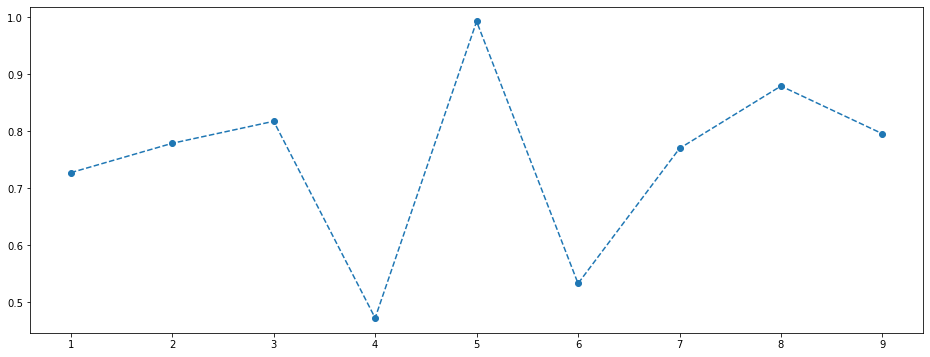

In [52]:
plt.figure(figsize = (16,6))
plt.plot(range(1,10), error_rate, ls= "--", marker = "o")

In [53]:
km_model = KMeans(3)
km_model.fit(df.drop("Private", axis=1))

KMeans(n_clusters=3)

In [54]:
km_model.cluster_centers_

array([[1.70182301e+03, 1.23653451e+03, 4.91520354e+02, 2.18194690e+01,
        4.97769912e+01, 2.22618053e+03, 6.56030088e+02, 9.28193982e+03,
        4.14370619e+03, 5.37015929e+02, 1.32979646e+03, 6.75787611e+01,
        7.51433628e+01, 1.46362832e+01, 2.09274336e+01, 7.83074690e+03,
        6.28070796e+01],
       [3.79185271e+03, 2.04663566e+03, 6.53937984e+02, 4.98372093e+01,
        7.72248062e+01, 2.57355039e+03, 2.35829457e+02, 1.69343256e+04,
        5.43727907e+03, 5.74604651e+02, 1.03575194e+03, 8.75193798e+01,
        9.33333333e+01, 1.02046512e+01, 3.51627907e+01, 1.78138140e+04,
        8.02868217e+01],
       [1.06216145e+04, 7.30063855e+03, 2.93942169e+03, 3.20000000e+01,
        6.34698795e+01, 1.54825060e+04, 3.17455422e+03, 8.23585542e+03,
        4.13487952e+03, 5.94349398e+02, 1.88833735e+03, 8.41566265e+01,
        8.95542169e+01, 1.64072289e+01, 1.58072289e+01, 9.44095181e+03,
        6.05060241e+01]])

In [55]:
km_model.labels_

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 0, 1, 0,
       0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0,
       0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,

In [56]:
clusterCenters = pd.DataFrame(km_model.cluster_centers_, columns= X_train.columns)

In [57]:
centers = clusterCenters.transpose()

In [58]:
centers

,0,1,2
Apps,1701.823009,3791.852713,10621.614458
Accept,1236.534513,2046.635659,7300.638554
Enroll,491.520354,653.937984,2939.421687
Top10perc,21.819469,49.837209,32.000000
Top25perc,49.776991,77.224806,63.469880
F.Undergrad,2226.180531,2573.550388,15482.506024
P.Undergrad,656.030088,235.829457,3174.554217
Outstate,9281.939823,16934.325581,8235.855422
Room.Board,4143.706195,5437.279070,4134.879518
Books,537.015929,574.604651,594.349398


## New DF using new labels(3)
- We will check if a model would improve predictions with 3 labels the target class (Private)
- What the Kmeans Algorithim is telling us here is there is possibly another classification of school other than just private and public in this data set
- Someone with domain knowledge would have more insight on this

In [59]:
df["Private"] = km_model.labels_

In [60]:
X = df.drop("Private", axis=1)
y = df["Private"]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [62]:
rfModel = RandomForestClassifier(n_estimators=300)

In [63]:
rfModel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [64]:
predictions = rfModel.predict(X_test)

In [65]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       190
           1       0.93      0.97      0.95        39
           2       0.97      1.00      0.98        28

    accuracy                           0.98       257
   macro avg       0.96      0.98      0.97       257
weighted avg       0.98      0.98      0.98       257



## Exporting Model
- Using Pickle to save

In [66]:
randomForestFilName = "threeLabelsFromKMeans_RandomForestModel.pkl"

In [67]:
with open(randomForestFilName, "wb") as file:
    pickle.dump(rfModel, file)

## loading Model

In [68]:
with open(randomForestFilName, "rb") as file:
    pickelModel = pickle.load(file)

## Testing New School

In [69]:
from random import randint
randomIndex = randint(0,len(df))
randomSchool = df.drop("Private", axis=1).iloc[randomIndex]

In [70]:
randomSchool

Apps           1110.0
Accept          930.0
Enroll          332.0
Top10perc        18.0
Top25perc        36.0
F.Undergrad    1603.0
P.Undergrad     374.0
Outstate       8180.0
Room.Board     4270.0
Books           500.0
Personal        500.0
PhD              65.0
Terminal         58.0
S.F.Ratio        15.2
perc.alumni      12.0
Expend         5664.0
Grad.Rate        29.0
Name: 215, dtype: float64

In [71]:
X_train.shape

(520, 17)

In [72]:
randomSchool = randomSchool.values.reshape(1,17)

In [73]:
pickelModel.predict(randomSchool)

array([0], dtype=int32)

In [74]:
df.iloc[randomIndex]["Private"]

0.0

In [75]:
df.iloc[randomIndex]

Private           0.0
Apps           1110.0
Accept          930.0
Enroll          332.0
Top10perc        18.0
Top25perc        36.0
F.Undergrad    1603.0
P.Undergrad     374.0
Outstate       8180.0
Room.Board     4270.0
Books           500.0
Personal        500.0
PhD              65.0
Terminal         58.0
S.F.Ratio        15.2
perc.alumni      12.0
Expend         5664.0
Grad.Rate        29.0
Name: 215, dtype: float64

In [76]:
randomIndex

215

In [77]:
classTwo = 420

In [78]:
classZero = 74

In [79]:
class_t2Data = df.iloc[420]

In [80]:
class_ZeroData = df.iloc[classZero]

In [81]:
dd = pd.DataFrame(class_t2Data)

In [82]:
dd["classZero"] = class_ZeroData

In [83]:
dd

,420,classZero
Private,2.0,0.0
Apps,10706.0,2362.0
Accept,7219.0,2037.0
Enroll,2397.0,700.0
Top10perc,12.0,40.0
Top25perc,37.0,68.0
F.Undergrad,14826.0,2607.0
P.Undergrad,1979.0,148.0
Outstate,7799.0,13130.0
Room.Board,3296.0,4650.0


<AxesSubplot:xlabel='Private', ylabel='count'>

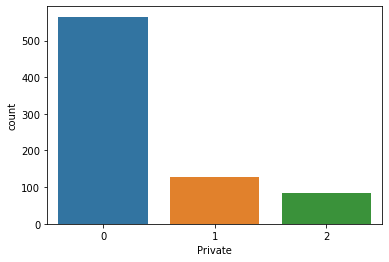

In [84]:
sns.countplot(x = df["Private"])

In [85]:
df["Private"].value_counts()

0    565
1    129
2     83
Name: Private, dtype: int64

In [86]:
df.corrwith(df['Private'])

Private        1.000000
Apps           0.678650
Accept         0.690178
Enroll         0.707704
Top10perc      0.393373
Top25perc      0.391789
F.Undergrad    0.717304
P.Undergrad    0.385070
Outstate       0.225297
Room.Board     0.179295
Books          0.124748
Personal       0.146406
PhD            0.450171
Terminal       0.442949
S.F.Ratio     -0.056537
perc.alumni    0.069867
Expend         0.373671
Grad.Rate      0.121856
dtype: float64